## Outlier Detection 

In [45]:
import numpy as np
import matplotlib.pyplot as plt 

t = np.arange(0, 2 * np.pi, 0.01)
x = np.sin(t)
y = np.cos(t)
inputs = np.stack((x, y), axis=1)
inputs.shape

(629, 2)

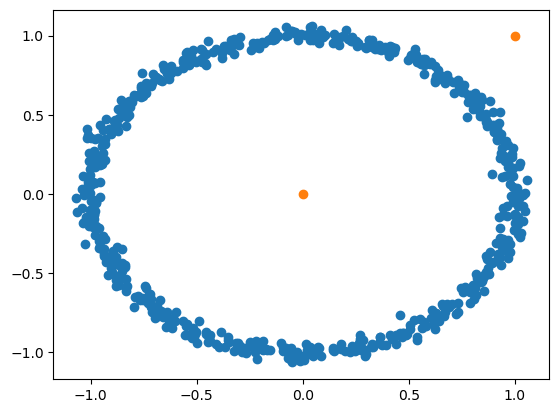

In [46]:
inputs += np.random.normal(0, size=inputs.shape) * 0.03
outliers = np.array([[0, 0], [1, 1]])
plt.scatter(inputs[:, 0], inputs[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1])

In [47]:
from   keras.models import Sequential, Model
from   keras.layers import Dense, Input
from   keras import optimizers
from   keras.optimizers import Adam

encoder = Sequential()
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(2))

autoencoder = Sequential([encoder, decoder])

In [48]:
autoencoder.compile(loss="mse")

In [49]:
ran_idxs = np.array(range(len(inputs)))
np.random.shuffle(ran_idxs)

In [55]:
# np.random.shuffle(inputs)

inputs = inputs[ran_idxs]

autoencoder.fit(inputs, inputs, validation_split=.2, epochs=150)

Epoch 1/150
16/16 [==============================] - 0s 10ms/step - loss: 0.0177 - val_loss: 0.0236
Epoch 2/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0156 - val_loss: 0.0247
Epoch 3/150
16/16 [==============================] - 0s 9ms/step - loss: 0.0160 - val_loss: 0.0229
Epoch 4/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0143 - val_loss: 0.0275
Epoch 5/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0165 - val_loss: 0.0244
Epoch 6/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.0227
Epoch 7/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0251
Epoch 8/150
16/16 [==============================] - 0s 8ms/step - loss: 0.0155 - val_loss: 0.0254
Epoch 9/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 0.0241
Epoch 10/150
16/16 [==============================] - 0s 7ms/step - loss: 0.0151 - val_loss: 0.0234
Epoch 11

20/20 [==============================] - 0s 2ms/step


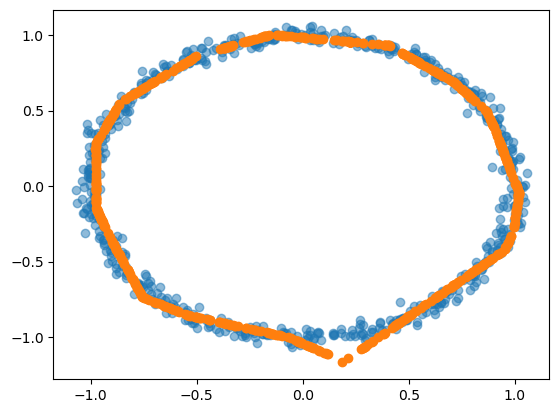

In [56]:
reconsturcted_points = autoencoder.predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], alpha=.5)
plt.scatter(reconsturcted_points[:, 0], reconsturcted_points[:, 1])

In [57]:
np.linalg.norm(inputs - reconsturcted_points, axis=1).mean()

0.06779907909591763

In [58]:
pred = autoencoder.predict(outliers)
pred

1/1 [==============================] - 0s 16ms/step


array([[-0.10499242,  0.9984249 ],
       [ 0.75898916,  0.62986845]], dtype=float32)

In [59]:
np.linalg.norm(outliers - pred, axis=1) # np.linalg.norm is the loss function mean squared error 

array([1.00393011, 0.44168268])

## Multidimensional

In [37]:
z = np.arange(0, 1, .0001)
x = z * np.sin(z * 30)
y = z * np.cos(z * 30)

# plotting
inputs = np.stack((x, y, z), axis=1)
inputs += np.random.normal(0, size=inputs.shape) * 0.002

inputs = (inputs - np.min(inputs)) / (np.max(inputs) - np.min(inputs))

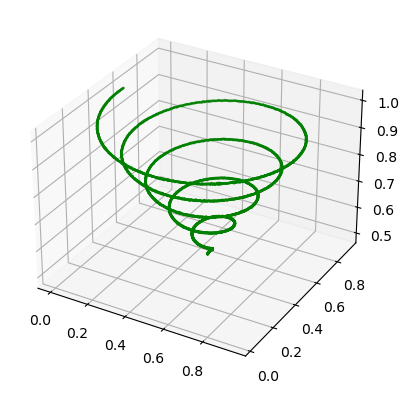

In [38]:
ax = plt.axes(projection ='3d')
ax.scatter3D(inputs[:, 0], inputs[:, 1], inputs[:, 2], color = "green", s=.5)
plt.show()

In [39]:
encoder = Sequential()
# encoder.add(Dense(1028, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(64, activation="relu"))
decoder.add(Dense(32, activation="relu"))
# decoder.add(Dense(1028, activation="relu"))
decoder.add(Dense(3))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse")

In [40]:
from keras.callbacks import Callback

class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=0, patience=0):
        super().__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose
        self.patience = patience 
        self.patience_count = 0

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            if self.patience_count >= self.patience:
                self.model.stop_training = True
            self.patience_count += 1
        else:
            self.patience_count = 0

np.random.shuffle(inputs)

# callback = new_callback()# .EarlyStopping(monitor='loss', patience=5, min_delta=5e-10)
callback = EarlyStoppingByLossVal(monitor='val_loss', value=5e-4, verbose=1, patience=10)
history = autoencoder.fit(inputs, inputs, validation_split=.2, epochs=2000, batch_size=16, callbacks=[callback])

Epoch 1/2000
500/500 [==============================] - 3s 5ms/step - loss: 0.0319 - val_loss: 0.0219
Epoch 2/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0199 - val_loss: 0.0176
Epoch 3/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0174 - val_loss: 0.0161
Epoch 4/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0164 - val_loss: 0.0152
Epoch 5/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0156 - val_loss: 0.0144
Epoch 6/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0145 - val_loss: 0.0130
Epoch 7/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0136 - val_loss: 0.0116
Epoch 8/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 9/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.0106 - val_loss: 0.0128
Epoch 10/2000
500/500 [==============================] - 2s 4ms/step - loss: 0.009

In [41]:
encoder.summary(), decoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (16, 32)                  128       
                                                                 
 dense_31 (Dense)            (16, 64)                  2112      
                                                                 
 dense_32 (Dense)            (16, 16)                  1040      
                                                                 
 dense_33 (Dense)            (16, 1)                   17        
                                                                 
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)           

(None, None)

313/313 [==============================] - 0s 1ms/step


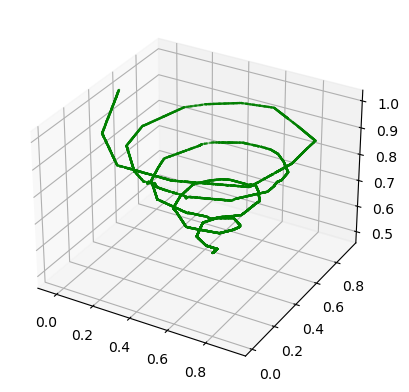

In [42]:
reconstructed_point = autoencoder.predict(inputs)
ax = plt.axes(projection ='3d')
ax.scatter3D(reconstructed_point[:, 0], reconstructed_point[:, 1], reconstructed_point[:, 2], color = "green", s=.5)
plt.show()
